## Dados sobre as reclamações realizadas no site:

https://www.consumidor.gov.br/pages/principal/?1652964614719

- Dados referentes ao ano de 2022 (Janeiro até Setembro)

### Bibliotecas Utilizadas:

In [1]:
# Imports

# Manipulaçao dos dados
import pandas as pd

# Visualização dos dados 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

# Ignore Warning(Avisos)
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x:'%.2f' % x)

### Carregando a base de dados:

In [2]:
# Carregando os dados já Pré-Processados
df_gov = pd.read_parquet('../Data/Data_for_clear/dfGov.gzip')

# Amostra
df_gov.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Solicitação,Mes Finalização,Mes Nome Finalização,Dia Semana Finalização,Dia Semana Nome Finalização
0,S,SC,Florianópolis,M,entre 51 a 60 anos,2022-01-19,0.00,Banco BV (antigo Banco Votorantim),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Financiamentos de Veículos / Leasing,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Loja física,S,N,Finalizada avaliada,Não Resolvida,1.00,1,1,Janeiro,2,Quarta-Feira
1,NE,MA,Timon,M,mais de 70 anos,2022-01-01,0.00,Oi Fixo,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Internet,S,N,Finalizada não avaliada,Não Avaliada,1.00,1,1,Janeiro,5,Sábado
2,S,RS,Santa Maria,M,entre 21 a 30 anos,2022-01-01,10.00,Vivo - Telefônica,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada não avaliada,Não Avaliada,1.00,1,1,Janeiro,5,Sábado
3,NE,BA,Teixeira de Freitas,M,entre 21 a 30 anos,2022-01-01,0.00,Uber,Empresas de Intermediação de Serviços / Negócios,Demais Serviços,Aplicativo de mobilidade urbana,Contrato / Oferta,Dificuldade para contratar o serviço (problema...,Não comprei / contratei,S,N,Finalizada não avaliada,Não Avaliada,1.00,1,1,Janeiro,5,Sábado
4,SE,RJ,Rio de Janeiro,M,entre 41 a 50 anos,2022-01-04,0.00,Central Nacional Unimed,Operadoras de Planos de Saúde e Administradora...,Saúde,"Plano de Saúde (convênio, autogestão, seguro s...",Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Domicílio,S,N,Finalizada não avaliada,Não Avaliada,1.00,1,1,Janeiro,1,Terça-Feira


### Informações do dataset

In [ ]:
# Verificando o nome das colunas do DataFrame
df_gov.columns

In [ ]:
# Verificando a quantidade de linhas e colunas do DataFrame
df_gov.shape

In [ ]:
# Info do dataset
df_gov.info()

In [ ]:
# Descrição do dataset 
df_gov.describe()

## Respondendo algumas Perguntas

In [17]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette="Set2")

- 1 - Qual a Quantidade de Solicitações(Reclamações Respondidas e Não Respondidas)?

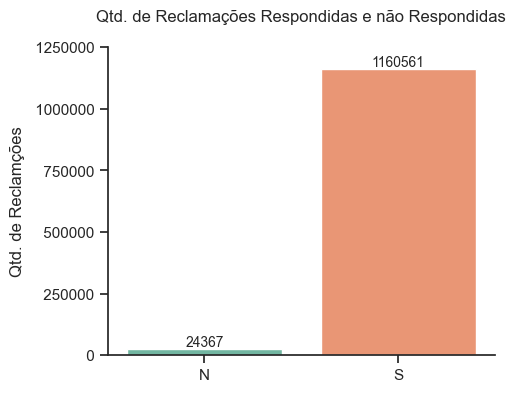

-----
Porcentagem de Reclamações:
Reclamações Respondidas: 97.94%
Reclamações Não Respondidas: 2.06%
-----


In [25]:
fig, ax = plt.subplots(figsize=(5,4))

splot = sns.countplot(x=df_gov['Respondida'])
for p in splot.patches:
    splot.annotate(format(int(p.get_height()), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext = (0, 5), textcoords='offset points', size=10)

plt.title('Qtd. de Reclamações Respondidas e não Respondidas\n')
plt.xlabel(' ')
plt.ylabel('Qtd. de Reclamções')
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'))
plt.ylim(0, 1250000)
plt.show()

rec_rec = df_gov['Respondida'].value_counts(normalize=True)
print('-----')
print('Porcentagem de Reclamações:')
print('Reclamações Respondidas: {:.2%}'.format(rec_rec[0]))
print('Reclamações Não Respondidas: {:.2%}'.format(rec_rec[1]))
print('-----')

- 2 - Qual A Quandidade de Solicitações(Reclamações) por Sexo?

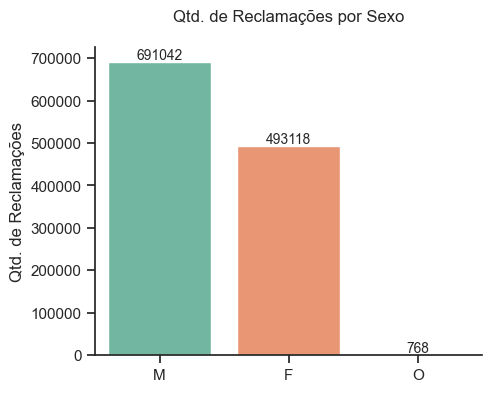

-----
Porcentagem de Reclamações por Sexo:
Reclamações Realiazadas(M): 58.32%
Reclamações Realiazadas(F): 41.62%
Reclamações Realiazadas(O): 0.06%
-----


In [24]:
plt.figure(figsize=(5,4))

splot = sns.countplot(x=df_gov['Sexo'])
for p in splot.patches:
    splot.annotate(format(int(p.get_height()), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext = (0, 5), textcoords = 'offset points', size=10)
    
plt.title('Qtd. de Reclamações por Sexo\n')
plt.xlabel(' ')
plt.ylabel('Qtd. de Reclamações')
plt.show()

rec_se = df_gov['Sexo'].value_counts(normalize=True)
print('-----')
print('Porcentagem de Reclamações por Sexo:')
print('Reclamações Realiazadas(M): {:.2%}'.format(rec_se[0]))
print('Reclamações Realiazadas(F): {:.2%}'.format(rec_se[1]))
print('Reclamações Realiazadas(O): {:.2%}'.format(rec_se[2]))
print('-----')

- 3 - Qual A Quandidade de Solicitações(Reclamações) por Região e Sexo?

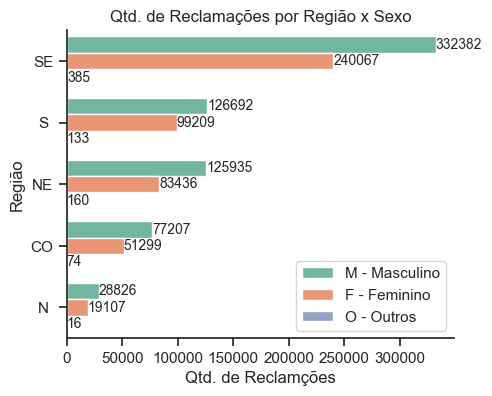

-----
Porcentagem de Reclamações por Região:
Reclamações Realizadas(SE): 48.34%
Reclamações Realizadas(S): 19.08%
Reclamações Realizadas(NE): 17.68%
Reclamações Realizadas(CO): 10.85%
Reclamações Realizadas(N): 4.05%
-----


In [40]:
plt.figure(figsize=(5,4))

splot = sns.countplot(y=df_gov['Região'], hue=df_gov['Sexo'], order=df_gov['Região'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por Região x Sexo')
plt.xlabel('Qtd. de Reclamções')
plt.ylabel('Região')
plt.legend(labels=['M - Masculino', 'F - Feminino', 'O - Outros'], ncol=1)

plt.show()

rec_uf = df_gov['Região'].value_counts(normalize=True)
print('-----')
print('Porcentagem de Reclamações por Região:')
print('Reclamações Realizadas(SE): {:.2%}'.format(rec_uf[0]))
print('Reclamações Realizadas(S): {:.2%}'.format(rec_uf[1]))
print('Reclamações Realizadas(NE): {:.2%}'.format(rec_uf[2]))
print('Reclamações Realizadas(CO): {:.2%}'.format(rec_uf[3]))
print('Reclamações Realizadas(N): {:.2%}'.format(rec_uf[4]))
print('-----')

- 4 - Qual A Quandidade de Solicitações(Reclamações) por UF?

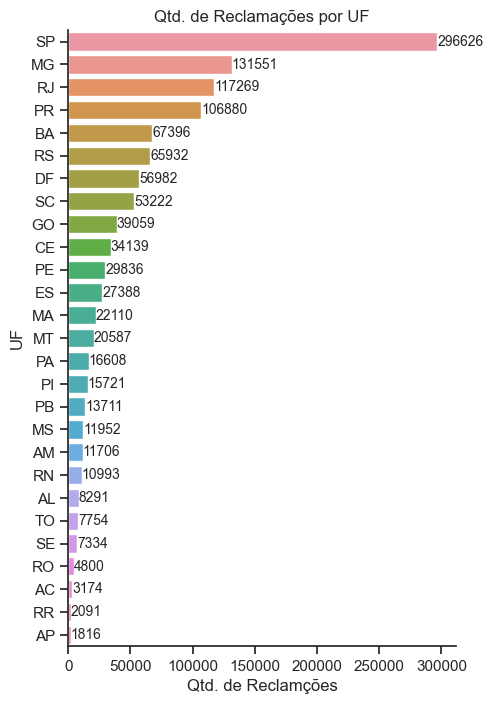

-----
Porcentagem de Reclamações por UF:
Reclamações realizadas - SP: 25.03% 
Reclamações realizadas - MG: 11.10% 
Reclamações realizadas - RJ: 9.90% 
Reclamações realizadas - PR: 9.02% 
Reclamações realizadas - BA: 5.69% 
Reclamações realizadas - RS: 5.56% 
Reclamações realizadas - DF: 4.81% 
Reclamações realizadas - SC: 4.49% 
Reclamações realizadas - GO: 3.30% 
Reclamações realizadas - CE: 2.88% 
Reclamações realizadas - PE: 2.52% 
Reclamações realizadas - ES: 2.31% 
Reclamações realizadas - MA: 1.87% 
Reclamações realizadas - MT: 1.74% 
Reclamações realizadas - PA: 1.40% 
Reclamações realizadas - PI: 1.33% 
Reclamações realizadas - PB: 1.16% 
Reclamações realizadas - MS: 1.01% 
Reclamações realizadas - AM: 0.99% 
Reclamações realizadas - RN: 0.93% 
Reclamações realizadas - AL: 0.70% 
Reclamações realizadas - TO: 0.65% 
Reclamações realizadas - SE: 0.62% 
Reclamações realizadas - RO: 0.41% 
Reclamações realizadas - AC: 0.27% 
Reclamações realizadas - RR: 0.18% 
Reclamações realizada

In [41]:
plt.figure(figsize=(5,8))

splot = sns.countplot(y=df_gov['UF'], order=df_gov['UF'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por UF')
plt.xlabel('Qtd. de Reclamções')
plt.ylabel('UF')
plt.show()

uf_nor = df_gov['UF'].value_counts(normalize=True)
uf_nor = pd.DataFrame(uf_nor)
uf_nor.reset_index(inplace=True)
uf_nor.rename(columns=({'index':'UF','UF':'Qtd. de Reclamações'}), inplace=True)

j = 0
print('-----')
print('Porcentagem de Reclamações por UF:')
for i in uf_nor['UF']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,uf_nor['Qtd. de Reclamações'][j]))
        j = j + 1  
print('-----')

- 5 - Qual A Quandidade de Solicitações(Reclamações) por Faixa Etária?

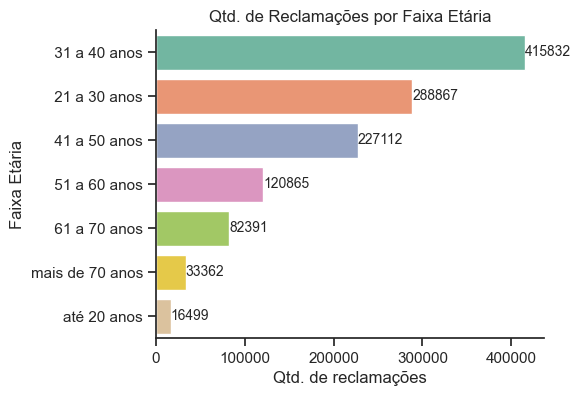

-----
Porcentagem de Reclamações por Faixa Etária:
Reclamações Realizadas - Entre 31 a 40Anos: 35.09% 
Reclamações Realizadas - Entre 21 a 30Anos: 24.38%
Reclamações Realizadas - Entre 41 a 50Anos: 19.17%
Reclamações Realizadas - Entre 51 a 60Anos: 10.20%
Reclamações Realizadas - Entre 61 a 70Anos: 6.95%
Reclamações Realizadas - Mais de 70Anos: 2.82%
Reclamações Realizadas - Até 20Anos: 1.39%
-----


In [45]:
df_gov['Faixa Etária'] = df_gov['Faixa Etária'].str.replace('entre','', regex=True) 

plt.figure(figsize=(5,4))

splot = sns.countplot(y=df_gov['Faixa Etária'], order=df_gov['Faixa Etária'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por Faixa Etária')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Faixa Etária')
plt.show()

rec_fe = df_gov['Faixa Etária'].value_counts(normalize=True)
print('-----')
print('Porcentagem de Reclamações por Faixa Etária:')
print('Reclamações Realizadas - Entre 31 a 40Anos:\033[1;31m {:.2%} \033[0;0m'.format(rec_fe[0]))
print('Reclamações Realizadas - Entre 21 a 30Anos:\033[1;31m {:.2%} \033[0;0m'.format(rec_fe[1]))
print('Reclamações Realizadas - Entre 41 a 50Anos: \033[1;31m {:.2%} \033[0;0m'.format(rec_fe[2]))
print('Reclamações Realizadas - Entre 51 a 60Anos: \033[1;31m {:.2%} \033[0;0m'.format(rec_fe[3]))
print('Reclamações Realizadas - Entre 61 a 70Anos: \033[1;31m {:.2%} \033[0;0m'.format(rec_fe[4]))
print('Reclamações Realizadas - Mais de 70Anos: \033[1;31m {:.2%} \033[0;0m'.format(rec_fe[5]))
print('Reclamações Realizadas - Até 20Anos: \033[1;31m {:.2%} \033[0;0m'.format(rec_fe[6]))
print('-----')

- 6 - Qual A Quandidade de Solicitações(Reclamações) por Faixa Etária e Sexo?

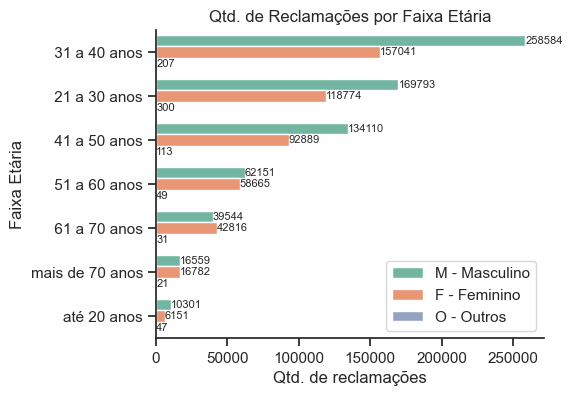

In [49]:
df_gov['Faixa Etária'] = df_gov['Faixa Etária'].str.replace('entre','', regex=True) 

plt.figure(figsize=(5,4))

splot = sns.countplot(y=df_gov['Faixa Etária'], hue=df_gov['Sexo'], order=df_gov['Faixa Etária'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=8, va='center')

plt.title('Qtd. de Reclamações por Faixa Etária e Sexo')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Faixa Etária')
plt.legend(labels=['M - Masculino', 'F - Feminino', 'O - Outros'], ncol=1)
plt.show()

- 7 - Qual A Quandidade de Solicitações(Reclamações) por Mês?

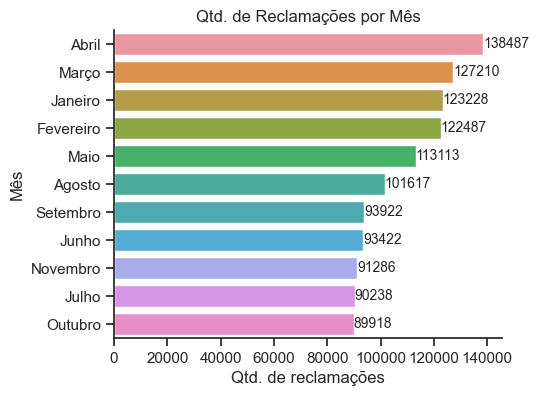

-----
Porcentagem de Reclamações Mês:
Reclamações realizadas - Abril: 11.69% 
Reclamações realizadas - Março: 10.74% 
Reclamações realizadas - Janeiro: 10.40% 
Reclamações realizadas - Fevereiro: 10.34% 
Reclamações realizadas - Maio: 9.55% 
Reclamações realizadas - Agosto: 8.58% 
Reclamações realizadas - Setembro: 7.93% 
Reclamações realizadas - Junho: 7.88% 
Reclamações realizadas - Novembro: 7.70% 
Reclamações realizadas - Julho: 7.62% 
Reclamações realizadas - Outubro: 7.59% 
-----


In [53]:
plt.figure(figsize=(5,4))

splot = sns.countplot(y=df_gov['Mes Nome Finalização'], order=df_gov['Mes Nome Finalização'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por Mês')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Mês')
plt.show()   

mes_nor = df_gov['Mes Nome Finalização'].value_counts(normalize=True)
mes_nor = pd.DataFrame(mes_nor)
mes_nor.reset_index(inplace=True)
mes_nor.rename(columns=({'index':'Mes Nome Finalização','Mes Nome Finalização':'Qtd. de Reclamações'}), inplace=True)

j = 0
print('-----')
print('Porcentagem de Reclamações Mês:')
for i in mes_nor['Mes Nome Finalização']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,mes_nor['Qtd. de Reclamações'][j]))
        j = j + 1   
print('-----')

- 8 - Qual A Quandidade de Solicitações(Reclamações) por Mês e Sexo?

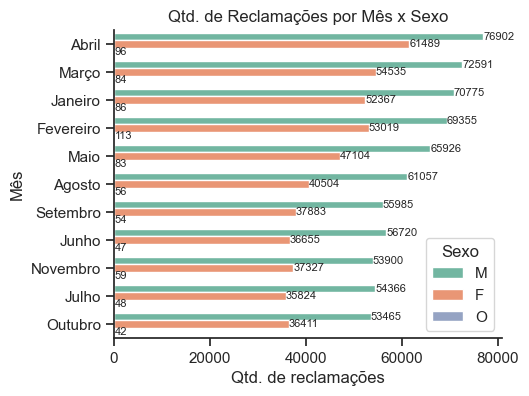

In [58]:
plt.figure(figsize=(5,4))

splot = sns.countplot(y=df_gov['Mes Nome Finalização'], hue=df_gov['Sexo'], order=df_gov['Mes Nome Finalização'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=8, va='center')

plt.title('Qtd. de Reclamações por Mês x Sexo')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Mês')
plt.legend(labels=['M - Masculino', 'F - Feminino', 'O - Outros'], ncol=1)
plt.show() 

- 7 - Qual A Quandidade de Solicitações(Reclamações) por dia da semana?

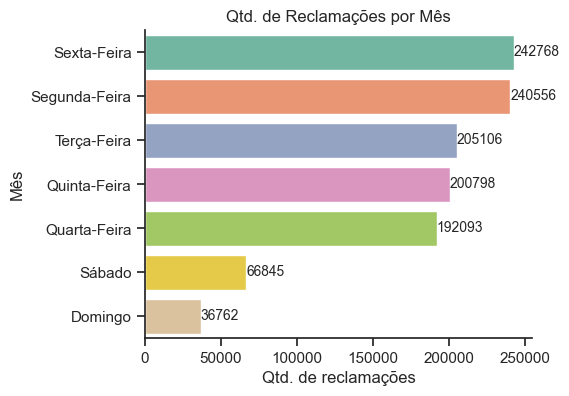

Reclamações realizadas - Sexta-Feira: 20.49% 
Reclamações realizadas - Segunda-Feira: 20.30% 
Reclamações realizadas - Terça-Feira: 17.31% 
Reclamações realizadas - Quinta-Feira: 16.95% 
Reclamações realizadas - Quarta-Feira: 16.21% 
Reclamações realizadas - Sábado: 5.64% 
Reclamações realizadas - Domingo: 3.10% 


In [55]:
plt.figure(figsize=(5,4))

splot = sns.countplot(y=df_gov['Dia Semana Nome Finalização'], order=df_gov['Dia Semana Nome Finalização'].value_counts().index)
for p in splot.patches:
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x), (x, y), size=10, va='center')

plt.title('Qtd. de Reclamações por Dia da Semana')
plt.xlabel('Qtd. de reclamações')
plt.ylabel('Mês')
plt.show()   

mes_nor = df_gov['Dia Semana Nome Finalização'].value_counts(normalize=True)
mes_nor = pd.DataFrame(mes_nor)
mes_nor.reset_index(inplace=True)
mes_nor.rename(columns=({'index':'Dia Semana Nome Finalização','Dia Semana Nome Finalização':'Qtd. de Reclamações'}), inplace=True)

j = 0
print('-----')
print('Porcentagem de Reclamações Mês:')
for i in mes_nor['Dia Semana Nome Finalização']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,mes_nor['Qtd. de Reclamações'][j]))
        j = j + 1  
print('-----')

- 8 - Qual a quantidade de solicitações(Reclamações) por Nome Fantasia(Empresa)

> 20 primeiro com mais solicitações(Reclamações)

In [ ]:
fant = df_gov['Nome Fantasia'].value_counts()
pd.DataFrame(fant)
fant2 = fant[0:20]
fant2 = pd.DataFrame(fant2)

fant2.reset_index(inplace=True)
fant2.rename(columns=({'index':'Nome Fantasia','Nome Fantasia':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

splot = sns.barplot(x=fant2['Qtd. de Reclamações'], y=fant2['Nome Fantasia'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Nome Fantasia(20 primeiros)')         
plt.show()        
        
fant_nor = df_gov['Nome Fantasia'].value_counts(normalize=True)
fant_nor = pd.DataFrame(fant_nor)
fant_nor.reset_index(inplace=True)
fant_nor.rename(columns=({'index':'Nome Fantasia','Nome Fantasia':'Qtd. de Reclamações'}), inplace=True)

fant_nor = fant_nor[0:20]

j = 0
for i in fant_nor['Nome Fantasia']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,fant_nor['Qtd. de Reclamações'][j]))
        j = j + 1  

- 9 - Qual a quantidade de solicitações(Reclamações) por Segmento de Mercado

> 20 primeiro com mais solicitações(Reclamações)

In [ ]:
seg_merc = df_gov['Segmento de Mercado'].value_counts()
pd.DataFrame(seg_merc)
seg_merc2 = seg_merc[0:20]
seg_merc2 = pd.DataFrame(seg_merc2)

seg_merc2.reset_index(inplace=True)
seg_merc2.rename(columns=({'index':'Segmento de Mercado','Segmento de Mercado':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

splot = sns.barplot(x=seg_merc2['Qtd. de Reclamações'], y=seg_merc2['Segmento de Mercado'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Segmento de Mercado(20 primeiros)')         
plt.show()        
        
seg_nor = df_gov['Segmento de Mercado'].value_counts(normalize=True)
seg_nor = pd.DataFrame(seg_nor)
seg_nor.reset_index(inplace=True)
seg_nor.rename(columns=({'index':'Segmento de Mercado','Segmento de Mercado':'Qtd. de Reclamações'}), inplace=True)

seg_nor = seg_nor[0:20]

j = 0
for i in seg_nor['Segmento de Mercado']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,seg_nor['Qtd. de Reclamações'][j]))
        j = j + 1 

- 10 - Qual a quantidade de solicitações(Reclamações) por Problema

> 20 primeiro com mais solicitações(Reclamações)

In [ ]:
probl = df_gov['Problema'].value_counts()
pd.DataFrame(probl)
probl2 = probl[0:20]
probl2 = pd.DataFrame(probl2)

probl2.reset_index(inplace=True)
probl2.rename(columns=({'index':'Problema','Problema':'Qtd. de Reclamações'}), inplace=True)
probl2.head()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

splot = sns.barplot(x=probl2['Qtd. de Reclamações'], y=probl2['Problema'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Problema Informardo(20 primeiros)')         
plt.show()        
        
probl_nor = df_gov['Problema'].value_counts(normalize=True)
probl_nor = pd.DataFrame(probl_nor)
probl_nor.reset_index(inplace=True)
probl_nor.rename(columns=({'index':'Problema','Problema':'Qtd. de Reclamações'}), inplace=True)

probl_nor = probl_nor[0:20]

j = 0
for i in probl_nor['Problema']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,probl_nor['Qtd. de Reclamações'][j]))
        j = j + 1  

- 11 - Qual a quantidade de solicitações(Reclamações) por Área

In [ ]:
seg_area = df_gov['Área'].value_counts()
pd.DataFrame(seg_area)
seg_area2 = seg_area[0:20]
seg_area2 = pd.DataFrame(seg_area2)

seg_area2.reset_index(inplace=True)
seg_area2.rename(columns=({'index':'Área','Área':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(4,5))

splot = sns.barplot(x=seg_area2['Qtd. de Reclamações'], y=seg_area2['Área'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=10, va='center')  
        
plt.title('Qtd. de Reclamações por (20 primeiros)')         
plt.show()        
        
seg_nor_area = df_gov['Área'].value_counts(normalize=True)
seg_nor_area = pd.DataFrame(seg_nor_area)
seg_nor_area.reset_index(inplace=True)
seg_nor_area.rename(columns=({'index':'Área','Área':'Qtd. de Reclamações'}), inplace=True)

seg_nor_area = seg_nor_area[0:20]

j = 0
for i in seg_nor_area['Área']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,seg_nor_area['Qtd. de Reclamações'][j]))
        j = j + 1 

- 11 - Qual a quantidade de solicitações(Reclamações) de como Comprou/Contratou

> 20 primeiro com mais solicitações(Reclamações)

In [ ]:
comp = df_gov['Como Comprou Contratou'].value_counts()
comp = pd.DataFrame(comp)

comp.reset_index(inplace=True)
comp.rename(columns=({'index':'Como Comprou Contratou','Como Comprou Contratou':'Qtd. de Reclamações'}), inplace=True)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(5,5))

splot = sns.barplot(x=comp['Qtd. de Reclamações'], y=comp['Como Comprou Contratou'])
for p in splot.patches:
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()/2
        splot.annotate(int(x),(x, y), size=14, va='center')  
        
plt.title('Qtd. de Reclamações por Como Comprou Contratou')         
plt.show()        
        
com_nor = df_gov['Como Comprou Contratou'].value_counts(normalize=True)
com_nor = pd.DataFrame(com_nor)
com_nor.reset_index(inplace=True)
com_nor.rename(columns=({'index':'Como Comprou Contratou','Como Comprou Contratou':'Qtd. de Reclamações'}), inplace=True)

j = 0
for i in com_nor['Como Comprou Contratou']:
        print('Reclamações realizadas - {}:\033[1;31m {:.2%} \033[0;0m'.format(i,com_nor['Qtd. de Reclamações'][j]))
        j = j + 1 

- 12 - Verificando a Quantidade de reclamações por 'Segmento de Mercado','Problema','Como Comprou Contratou'

> 20 primeiros com mais solicitações(Reclamações)

In [ ]:
order_p1 = df_gov.groupby(['Segmento de Mercado','Problema','Como Comprou Contratou'])['Solicitação'].agg(['count']).rename(columns={'count':'Total Reclamações'})

temp_df_p1 = order_p1.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p1['%'] = round((temp_df_p1['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p1 = temp_df_p1[0:20]

temp_df_p1.head(20)

- 13 - Verificando a Quantidade de reclamações por 'Nome Fantasia','Problema','Como Comprou Contratou'

> 20 primeiros com mais solicitações(Reclamações)

In [ ]:
order_p2 = df_gov.groupby(['Nome Fantasia','Problema','Como Comprou Contratou'])['Solicitação'].agg(['count']).rename(columns={'count':'Total Reclamações'})

temp_df_p2 = order_p2.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p2 = temp_df_p2[0:20]

temp_df_p2['%'] = round((temp_df_p2['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p2.head(20)

- 14 - Verificando o Tempo de Resposta das reclamações por 'Nome Fantasia','Tempo Resposta'

> 20 primeiros com mais solicitações(Reclamações)

In [ ]:
order_p3 = df_gov.groupby(['Nome Fantasia'])['Tempo Resposta'].agg(['mean','count']).rename(columns={'count':'Total Reclamações','mean':'Media Tempo Resposta'})


temp_df_p3 = order_p3.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p3 = temp_df_p3[0:20]

temp_df_p3['%'] = round((temp_df_p3['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p3.head(20)

- 15 - Verificando a faixa Etária das reclamações por 'Sexo','Faixa Etária','Região','Nome Fantasia','Total Reclamações'

> 20 primeiros com mais solicitações(Reclamações)

In [ ]:
order_p4 = df_gov.groupby(['Sexo','Faixa Etária','Região','Nome Fantasia'])['Solicitação'].agg(['count']).rename(columns={'count':'Total Reclamações'})

temp_df_p4 = order_p4.sort_values('Total Reclamações', ascending=False).reset_index()
temp_df_p4 = temp_df_p4[0:20]

temp_df_p4['%'] = round((temp_df_p4['Total Reclamações'].loc[:] / len(df_gov)) * 100,2)

temp_df_p4.head(20)

- 16 - Média do Tempo de Resposta e Nota do Consumidor por Segmento de Mercado

In [ ]:
order_p5 = df_gov[['Tempo Resposta','Nota do Consumidor','Segmento de Mercado']].groupby(['Segmento de Mercado']).mean().sort_values(by='Tempo Resposta', ascending=False)

order_p5

In [ ]:
# Verificando o nome das colunas do DataFrame
df_gov.columns

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(y=df_gov['Área'], palette='icefire_r')
plt.xlabel('País')
plt.ylabel('Número de Clientes');